## Basic level

In [451]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [452]:
movies = pd.read_csv("C:\\users\sarin_000\\Downloads\\unit-2_project-master\\unit-2_project-master\\data\imdb_1000.csv")

In [453]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [454]:
movies.shape

(979, 6)

In [455]:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

#### Check the data type of each column.

In [456]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [457]:
pd.DataFrame(movies.dtypes,columns=['DataType'])

,DataType
star_rating,float64
title,object
content_rating,object
genre,object
duration,int64
actors_list,object


#### Calculate the average movie duration.

In [458]:
movies.duration.mean()

120.97957099080695

In [459]:
movies[['duration']].describe()

,duration
count,979.000000
mean,120.979571
std,26.218010
min,64.000000
25%,102.000000
50%,117.000000
75%,134.000000
max,242.000000


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [460]:
movies.sort_values('duration', ascending= True).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


In [461]:
movies.sort_values('duration').tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

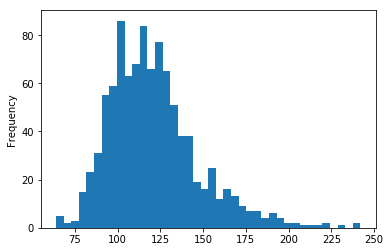

In [462]:
movies.duration.plot(kind='hist', bins=40);

#### Use a box plot to display that same data.

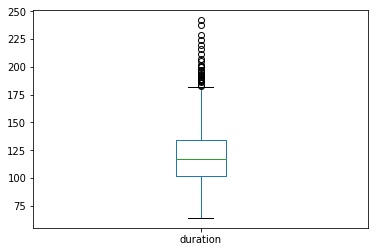

In [463]:
movies.duration.plot(kind='box');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [464]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Movies')

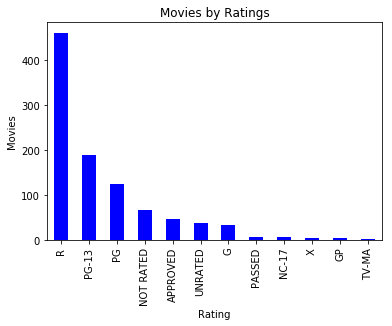

In [465]:
# Use a bar chart for catagorical data
movies.content_rating.value_counts().plot(kind='bar',title='Movies by Ratings', color ='blue')
plt.xlabel('Rating')
plt.ylabel('Movies')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [466]:
movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'],'UNRATED',inplace=True)

In [467]:
movies.content_rating.unique()

array(['R', 'PG-13', 'UNRATED', 'PG', 'G', 'X', nan, 'TV-MA', 'NC-17'],
      dtype=object)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [468]:
movies.content_rating.replace(['X','TV-MA'],'NC-17',inplace=True)


In [469]:
movies.content_rating.unique()

array(['R', 'PG-13', 'UNRATED', 'PG', 'G', 'NC-17', nan], dtype=object)

#### Count the number of missing values in each column.

In [470]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [471]:
movies.content_rating.unique()

array(['R', 'PG-13', 'UNRATED', 'PG', 'G', 'NC-17', nan], dtype=object)

In [472]:
#replace nan to Unrated
movies.content_rating.fillna('UNRATED',inplace=True)
movies.content_rating.unique()

array(['R', 'PG-13', 'UNRATED', 'PG', 'G', 'NC-17'], dtype=object)

In [473]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [474]:
movies[movies.duration > 120].mean()

star_rating      7.953670
duration       143.385321
dtype: float64

In [475]:
movies[movies.duration < 120].mean()

star_rating      7.838667
duration       102.405714
dtype: float64

#### Use a visualization to detect whether there is a relationship between duration and star rating.

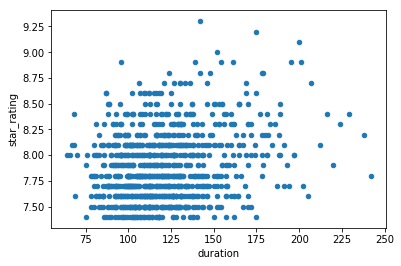

In [476]:
# to show the relationship of two variables, use a scatter plot
movies.plot(kind = 'scatter', x = 'duration', y = 'star_rating');

In [477]:
import seaborn as sns

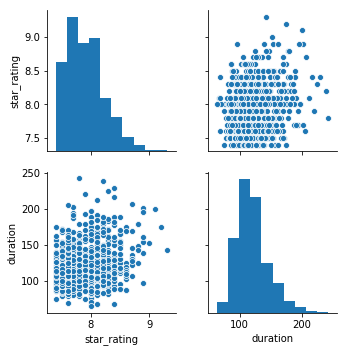

In [478]:
sns.pairplot(movies);

#### Calculate the average duration for each genre.

In [479]:
movies.groupby(['genre']).duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

In [480]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

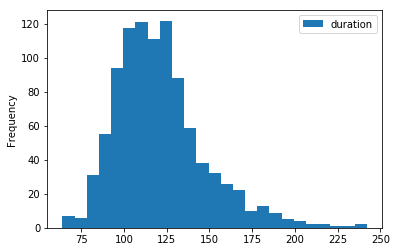

In [481]:
movies.plot(kind='hist', x= 'content_rating', y='duration', bins=25)

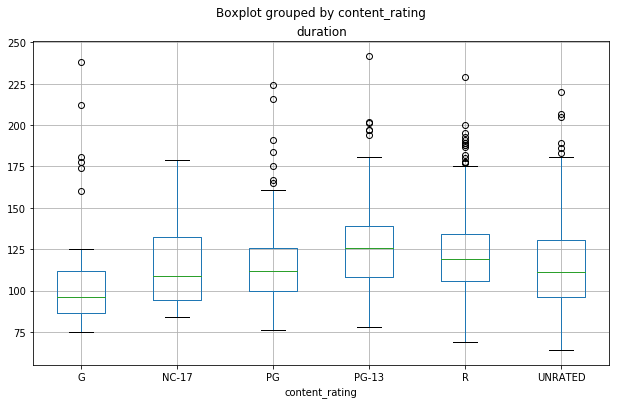

In [482]:
movies.boxplot(column='duration', by='content_rating', figsize=(10,6));

#### Determine the top rated movie (by star rating) for each genre.

In [483]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

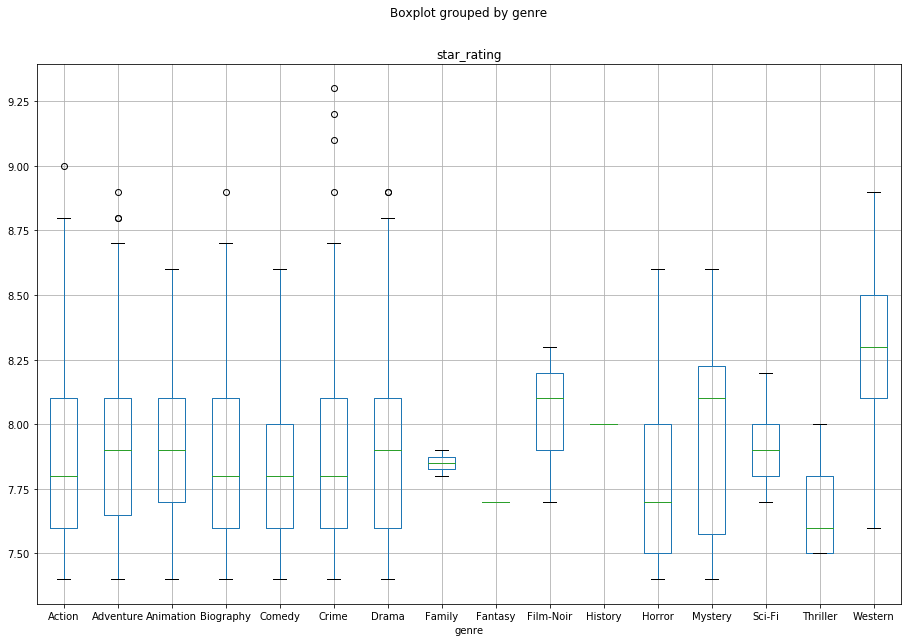

In [485]:
movies.boxplot(column='star_rating', by='genre', figsize=(15,10));

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [486]:
duplicate = movies[movies.title.duplicated()].title
duplicate

482    The Girl with the Dragon Tattoo
905                            Dracula
924                     Les Miserables
936                          True Grit
Name: title, dtype: object

In [487]:
movies[movies.title.isin(duplicate)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


I think duplicated titles are not actually duplicating movies as other informaion such as actors and duration are not identical.

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [488]:
movies.groupby('genre').star_rating.mean()
[movies.genre.value_counts()>10]


[Drama         True
 Comedy        True
 Action        True
 Crime         True
 Biography     True
 Adventure     True
 Animation     True
 Horror        True
 Mystery       True
 Western      False
 Thriller     False
 Sci-Fi       False
 Film-Noir    False
 Family       False
 Fantasy      False
 History      False
 Name: genre, dtype: bool]

#### Option 4: aggregate by count and mean, then filter using the count

In [489]:
df = movies.groupby('genre').star_rating.agg(['count','mean'])


In [490]:
df[df['count']>100]

,count,mean
genre,,
Action,136,7.884559
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518


## Bonus

#### Figure out something "interesting" using the actors data!

In [491]:
# Find the top 10 actors by star_ratings
movies.groupby('actors_list').star_rating.mean().sort_values(ascending= False).head(10)

actors_list
[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']           9.3
[u'Marlon Brando', u'Al Pacino', u'James Caan']              9.2
[u'Al Pacino', u'Robert De Niro', u'Robert Duvall']          9.1
[u'Christian Bale', u'Heath Ledger', u'Aaron Eckhart']       9.0
[u'Henry Fonda', u'Lee J. Cobb', u'Martin Balsam']           8.9
[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kingsley']          8.9
[u'Brad Pitt', u'Edward Norton', u'Helena Bonham Carter']    8.9
[u'Elijah Wood', u'Viggo Mortensen', u'Ian McKellen']        8.9
[u'John Travolta', u'Uma Thurman', u'Samuel L. Jackson']     8.9
[u'Clint Eastwood', u'Eli Wallach', u'Lee Van Cleef']        8.9
Name: star_rating, dtype: float64